In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import matplotlib as mpl

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors

# from matplotlib import rc

# # activate latex text rendering
# rc('text', usetex=True)

import numpy as np
import glob
import re 

In [2]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
file_base = './'


DataSetLables = {
    'midnightblue': 'Au-coated beam chamber',
    'green': 'Barrel silicon',
    'forestgreen': 'Barrel muRwell',
    'darkslategrey': 'Forward/backward silicon',
    'darkorange': 'Forward AC-LGAD',    
    'tab:red': 'mRICH AeroGel',
    'tab:orange': 'Backward AC-LGAD',
    'cornflowerblue': 'Backward EMCal',
    'darkgray': 'Inner det. spt./service',
    'goldenrod': 'Barrel AC-LGAD',
    'brown': 'DIRC',
    'tab:blue': 'BECal',
    'indigo': 'Active BCal Support',
    'firebrick': 'SC Magnet',
    'tab:brown': 'Dual RICH',
    'darkmagenta': 'Barrel HCal',
    'royalblue': 'Forward EMCal',
    'darkviolet': 'Forward LHCal',
};
# print('Mapping: ', DataSetLables)

datasets = list(DataSetLables.values())
color_map = {v: k for k, v in DataSetLables.items()}

print(datasets)
print(color_map)

mpl.style.use('seaborn-talk')
# colors = np.concatenate(pylab.cm.tab20(np.linspace(0,1,21))[0:19],  pylab.cm.tab20b(np.linspace(0,1,21))[0:19]) )
colors = np.concatenate( ( pylab.cm.Dark2(np.linspace(0,1,9))[0:7], pylab.cm.tab20(np.linspace(0,1,21))[0:19] ))

['Au-coated beam chamber', 'Barrel silicon', 'Barrel muRwell', 'Forward/backward silicon', 'Forward AC-LGAD', 'mRICH AeroGel', 'Backward AC-LGAD', 'Backward EMCal', 'Inner det. spt./service', 'Barrel AC-LGAD', 'DIRC', 'BECal', 'Active BCal Support', 'SC Magnet', 'Dual RICH', 'Barrel HCal', 'Forward EMCal', 'Forward LHCal']
{'Au-coated beam chamber': 'midnightblue', 'Barrel silicon': 'green', 'Barrel muRwell': 'forestgreen', 'Forward/backward silicon': 'darkslategrey', 'Forward AC-LGAD': 'darkorange', 'mRICH AeroGel': 'tab:red', 'Backward AC-LGAD': 'tab:orange', 'Backward EMCal': 'cornflowerblue', 'Inner det. spt./service': 'darkgray', 'Barrel AC-LGAD': 'goldenrod', 'DIRC': 'brown', 'BECal': 'tab:blue', 'Active BCal Support': 'indigo', 'SC Magnet': 'firebrick', 'Dual RICH': 'tab:brown', 'Barrel HCal': 'darkmagenta', 'Forward EMCal': 'royalblue', 'Forward LHCal': 'darkviolet'}


In [4]:
df_x0 = pd.read_csv(f"{file_base}x0_layer.csv")  
df_lambda0 = pd.read_csv(f"{file_base}lambda0_layer.csv")  

In [5]:
df_x0

,Unnamed: 0,eta,e-going theta [degree],Au-coated beam chamber,Barrel silicon,Barrel muRwell,Forward/backward silicon,Forward/backward MPGD,mRICH AeroGel,Barrel AC-LGAD,...,Backward EMCal,Inner det. spt./service,DIRC,BECal,Active BCal Support,SC Magnet,Barrel HCal,Backward Field Return,Forward EMCal,Forward LHCal
0,0,-4.300030,1.5547,10.417625,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,-4.295025,1.5625,10.483309,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2,-4.289981,1.5704,10.551309,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3,-4.285026,1.5782,10.600426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,4,-4.279969,1.5862,10.660238,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1716,4.279969,178.4138,8.360944,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.627272,43.780498
1717,1717,4.285026,178.4218,8.373976,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.526618,43.186618
1718,1718,4.289981,178.4296,8.408963,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.455260,42.902208
1719,1719,4.295025,178.4375,8.452610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.383262,42.818019


In [6]:
df_lambda0

,Unnamed: 0,eta,e-going theta [degree],Au-coated beam chamber,Barrel silicon,Barrel muRwell,Forward/backward silicon,Forward/backward MPGD,mRICH AeroGel,Barrel AC-LGAD,...,Backward EMCal,Inner det. spt./service,DIRC,BECal,Active BCal Support,SC Magnet,Barrel HCal,Backward Field Return,Forward EMCal,Forward LHCal
0,0,-4.300030,1.5547,1.077610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,-4.295025,1.5625,1.084404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2,-4.289981,1.5704,1.091438,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3,-4.285026,1.5782,1.096519,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,4,-4.279969,1.5862,1.102706,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1716,4.279969,178.4138,0.864864,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232991,3.197701
1717,1717,4.285026,178.4218,0.866212,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228208,3.167570
1718,1718,4.289981,178.4296,0.869832,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224617,3.155593
1719,1719,4.295025,178.4375,0.874346,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220984,3.148138


In [7]:
df_x0_stack = pd.DataFrame()
df_lambda0_stack = pd.DataFrame()

last_x0 = 0
last_lambda0 = 0

for dataset in datasets:
    
    df_x0_stack['eta'] = df_x0['eta']
    df_x0_stack['e-going theta [degree]'] = df_x0['e-going theta [degree]']
    df_lambda0_stack['eta'] = df_lambda0['eta']
    df_lambda0_stack['e-going theta [degree]'] = df_lambda0['e-going theta [degree]']
    
    last_x0 = last_x0 + df_x0[dataset].to_numpy()
    df_x0_stack[dataset] = last_x0
    
    last_lambda0 = last_lambda0 + df_lambda0[dataset].to_numpy()
    df_lambda0_stack[dataset] = last_lambda0
    
    

In [8]:
df_x0_stack

,eta,e-going theta [degree],Au-coated beam chamber,Barrel silicon,Barrel muRwell,Forward/backward silicon,Forward AC-LGAD,mRICH AeroGel,Backward AC-LGAD,Backward EMCal,Inner det. spt./service,Barrel AC-LGAD,DIRC,BECal,Active BCal Support,SC Magnet,Dual RICH,Barrel HCal,Forward EMCal,Forward LHCal
0,-4.300030,1.5547,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625,10.417625
1,-4.295025,1.5625,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309,10.483309
2,-4.289981,1.5704,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309,10.551309
3,-4.285026,1.5782,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426,10.600426
4,-4.279969,1.5862,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238,10.660238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,4.279969,178.4138,8.360944,8.360944,8.360944,8.360944,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,8.371638,12.998909,56.779407
1717,4.285026,178.4218,8.373976,8.373976,8.373976,8.373976,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,8.384495,12.911112,56.097730
1718,4.289981,178.4296,8.408963,8.408963,8.408963,8.408963,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,8.419361,12.874621,55.776829
1719,4.295025,178.4375,8.452610,8.452610,8.452610,8.452610,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,8.462886,12.846147,55.664167


In [9]:
df_lambda0_stack

,eta,e-going theta [degree],Au-coated beam chamber,Barrel silicon,Barrel muRwell,Forward/backward silicon,Forward AC-LGAD,mRICH AeroGel,Backward AC-LGAD,Backward EMCal,Inner det. spt./service,Barrel AC-LGAD,DIRC,BECal,Active BCal Support,SC Magnet,Dual RICH,Barrel HCal,Forward EMCal,Forward LHCal
0,-4.300030,1.5547,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610,1.077610
1,-4.295025,1.5625,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404,1.084404
2,-4.289981,1.5704,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438,1.091438
3,-4.285026,1.5782,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519,1.096519
4,-4.279969,1.5862,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706,1.102706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,4.279969,178.4138,0.864864,0.864864,0.864864,0.864864,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,0.867316,1.100307,4.298007
1717,4.285026,178.4218,0.866212,0.866212,0.866212,0.866212,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,0.868624,1.096832,4.264401
1718,4.289981,178.4296,0.869832,0.869832,0.869832,0.869832,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,0.872216,1.096833,4.252426
1719,4.295025,178.4375,0.874346,0.874346,0.874346,0.874346,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,0.876702,1.097687,4.245825


In [10]:
datasets

['Au-coated beam chamber',
 'Barrel silicon',
 'Barrel muRwell',
 'Forward/backward silicon',
 'Forward AC-LGAD',
 'mRICH AeroGel',
 'Backward AC-LGAD',
 'Backward EMCal',
 'Inner det. spt./service',
 'Barrel AC-LGAD',
 'DIRC',
 'BECal',
 'Active BCal Support',
 'SC Magnet',
 'Dual RICH',
 'Barrel HCal',
 'Forward EMCal',
 'Forward LHCal']

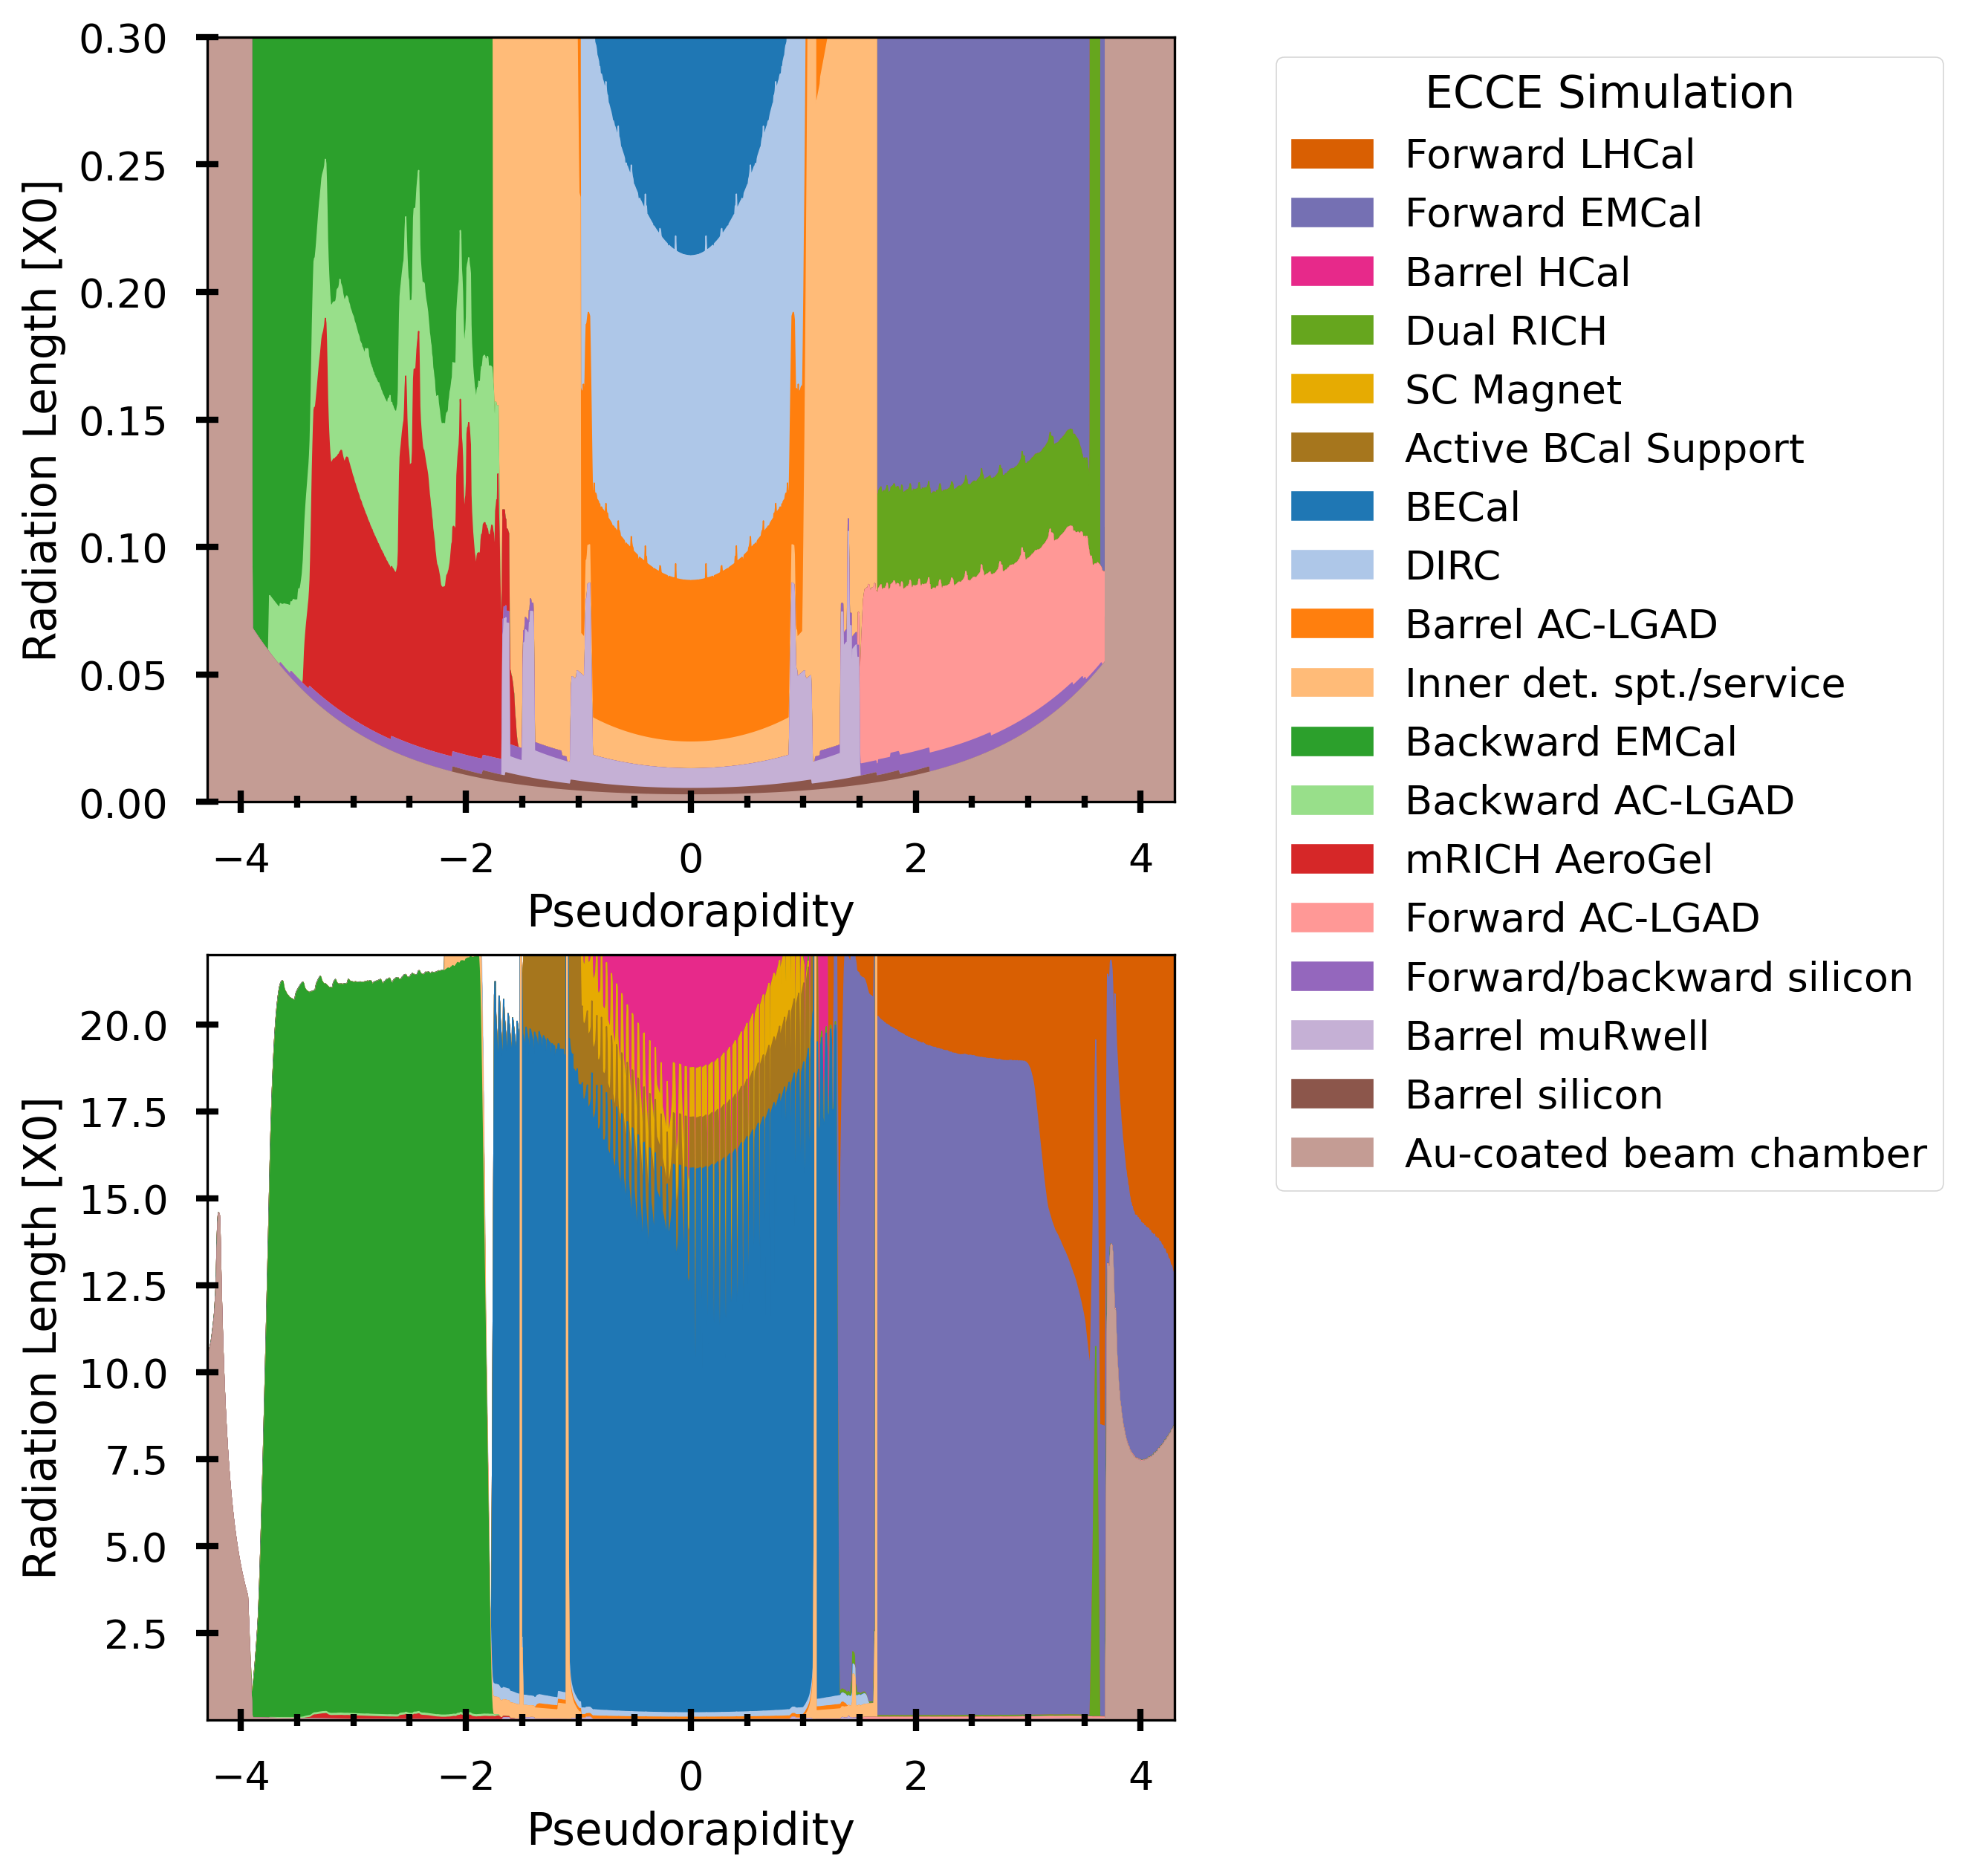

In [11]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)

color_index = 1;

datasets_reverse = datasets.copy();
datasets_reverse.reverse();

for dataset in datasets_reverse:
    
    etas = df_x0_stack['eta'].to_numpy()
    x0_avg= df_x0_stack[dataset].to_numpy()
    
    axs[0].fill_between( etas, 0, x0_avg, label=dataset, color = colors[color_index])
    
    axs[1].fill_between( etas, 0, x0_avg, label=dataset, color = colors[color_index])
   
    color_index = color_index +1
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([0, 0.3]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = 'ECCE Simulation',
         title_fontsize='x-large'
         )

ax=axs[1]

# ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([1e-3, 22]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
# ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
#          title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
#          title_fontsize='x-large'
#          )

plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length.png'), bbox_inches='tight')

adding Forward LHCal color darkviolet
adding Forward EMCal color royalblue
adding Barrel HCal color darkmagenta
adding Dual RICH color tab:brown
adding SC Magnet color firebrick
adding Active BCal Support color indigo
adding BECal color tab:blue
adding DIRC color brown
adding Barrel AC-LGAD color goldenrod
adding Inner det. spt./service color darkgray
adding Backward EMCal color cornflowerblue
adding Backward AC-LGAD color tab:orange
adding mRICH AeroGel color tab:red
adding Forward AC-LGAD color darkorange
adding Forward/backward silicon color darkslategrey
adding Barrel muRwell color forestgreen
adding Barrel silicon color green
adding Au-coated beam chamber color midnightblue


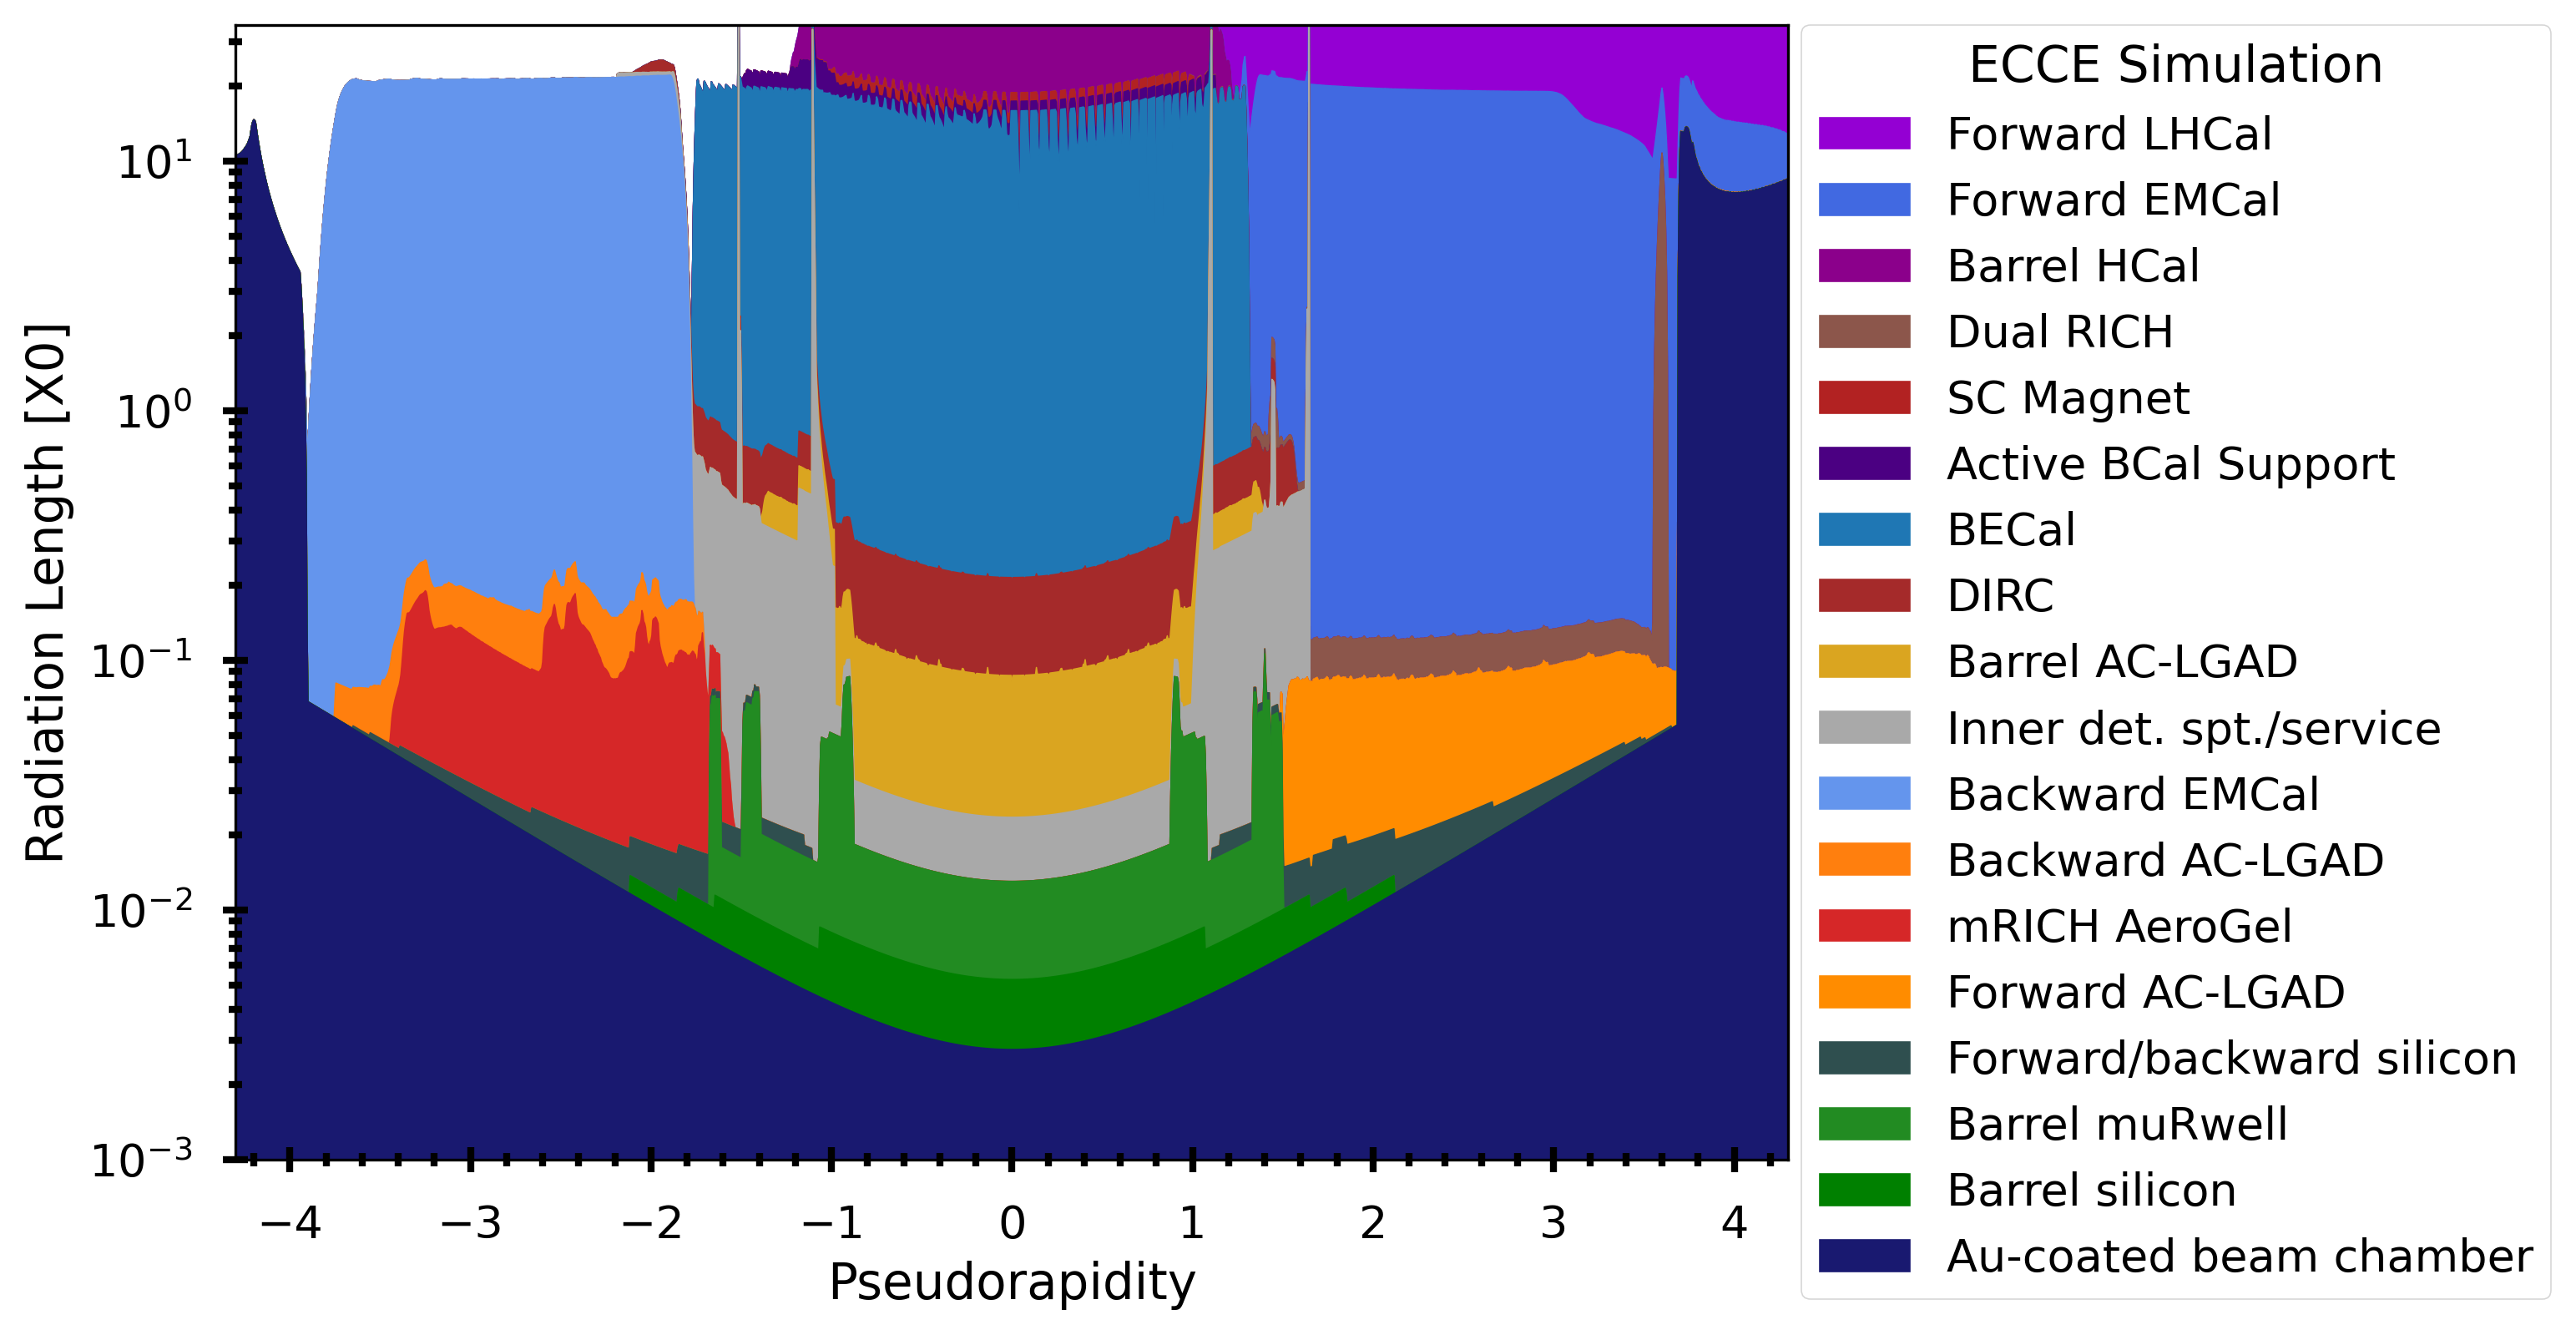

In [12]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=300)

datasets_reverse = datasets.copy();
datasets_reverse.reverse();

for dataset in datasets_reverse:
    
    etas = df_x0_stack['eta'].to_numpy()
    x0_avg= df_x0_stack[dataset].to_numpy()
    
    print(f'adding {dataset} color {color_map[dataset]}')
    axs.fill_between( etas, 0, x0_avg, label=dataset, color = color_map[dataset])
    

ax=axs
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([1e-3, 35]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
# ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1.02), ncol=1,
         title = f'ECCE Simulation',
         title_fontsize='x-large'
         )


plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_Log.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_Log.png'), bbox_inches='tight')

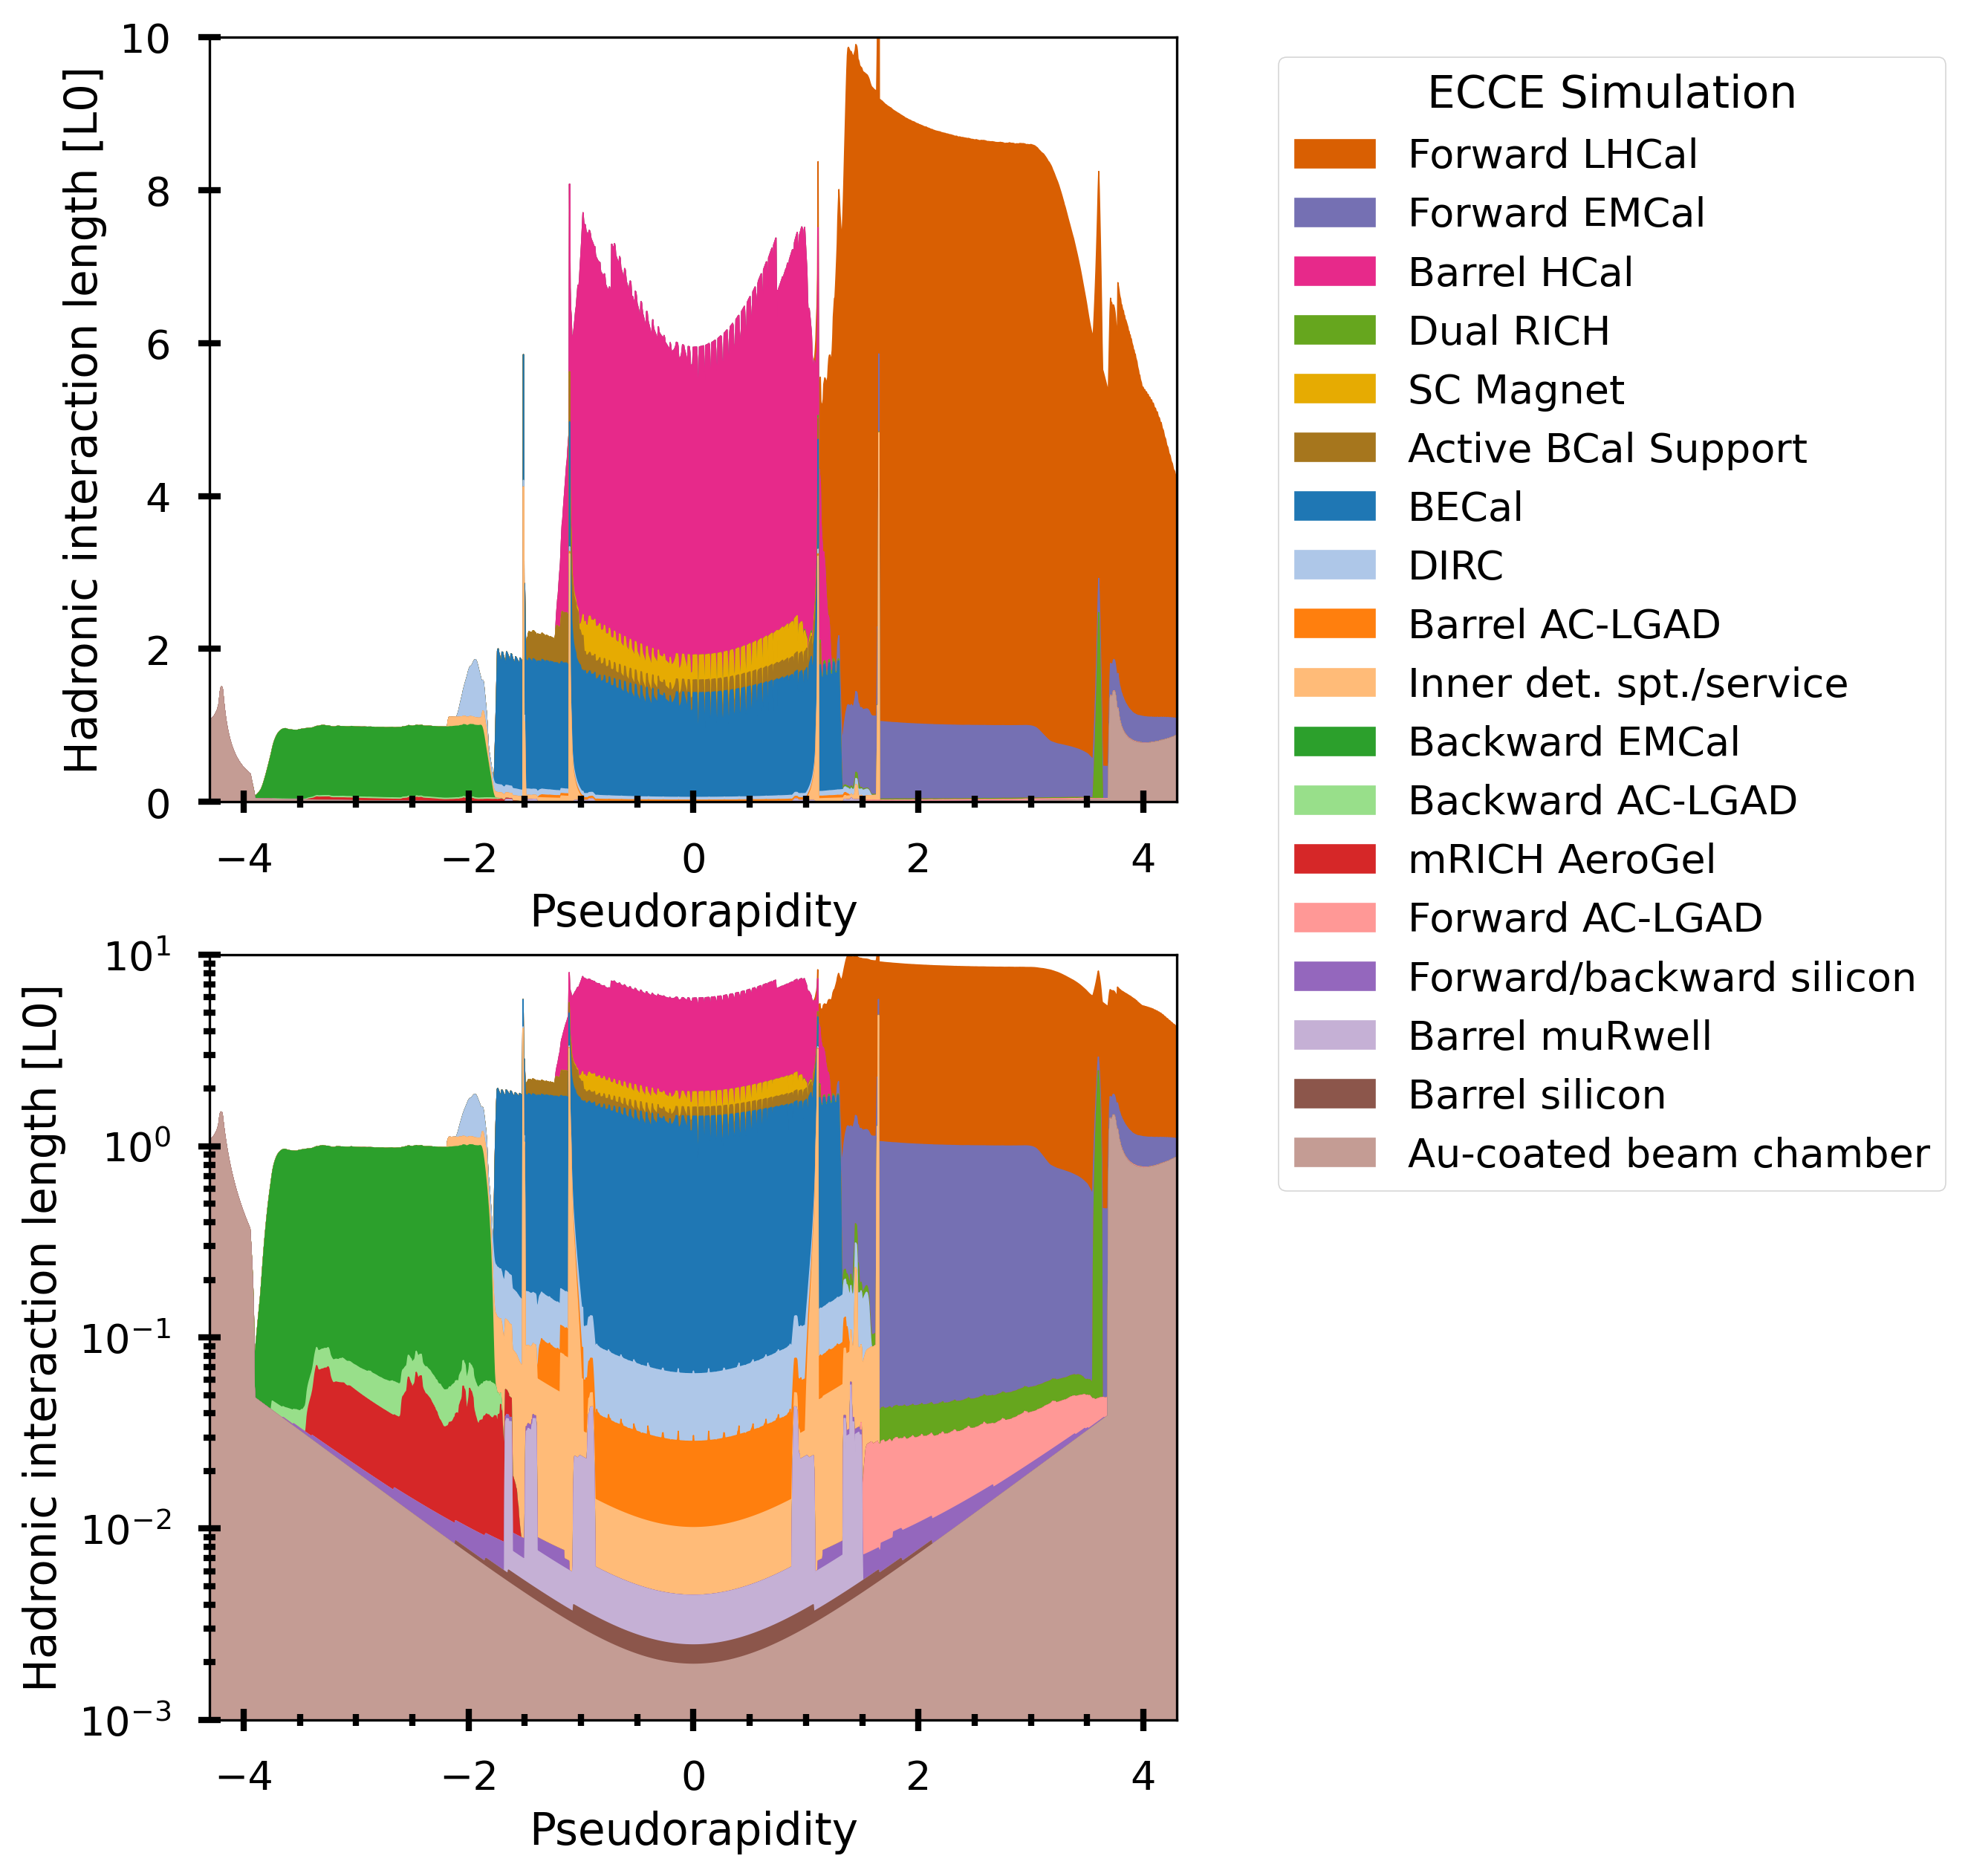

In [13]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)

datasets_reverse = datasets.copy();
datasets_reverse.reverse();
color_index = 1

for dataset in datasets_reverse:
    
    etas = df_lambda0_stack['eta'].to_numpy()
    lambda0_avg= df_lambda0_stack[dataset].to_numpy()
    
    axs[0].fill_between( etas, 0, lambda0_avg, label=dataset, color = colors[color_index])
    
    axs[1].fill_between( etas, 0, lambda0_avg, label=dataset, color = colors[color_index])
   
    color_index = color_index +1
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Hadronic interaction length [L0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([0, 10]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'ECCE Simulation',
         title_fontsize='x-large'
         )

ax=axs[1]

ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Hadronic interaction length [L0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([1e-3, 10]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
# ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
#          title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
#          title_fontsize='x-large'
#          )

plt.savefig(os.path.join(f'{file_base}lambda0_layer_Hadronic_Interaction_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}lambda0_layer_Hadronic_Interaction_Length.png'), bbox_inches='tight')

## Plot AC-LGADs alone

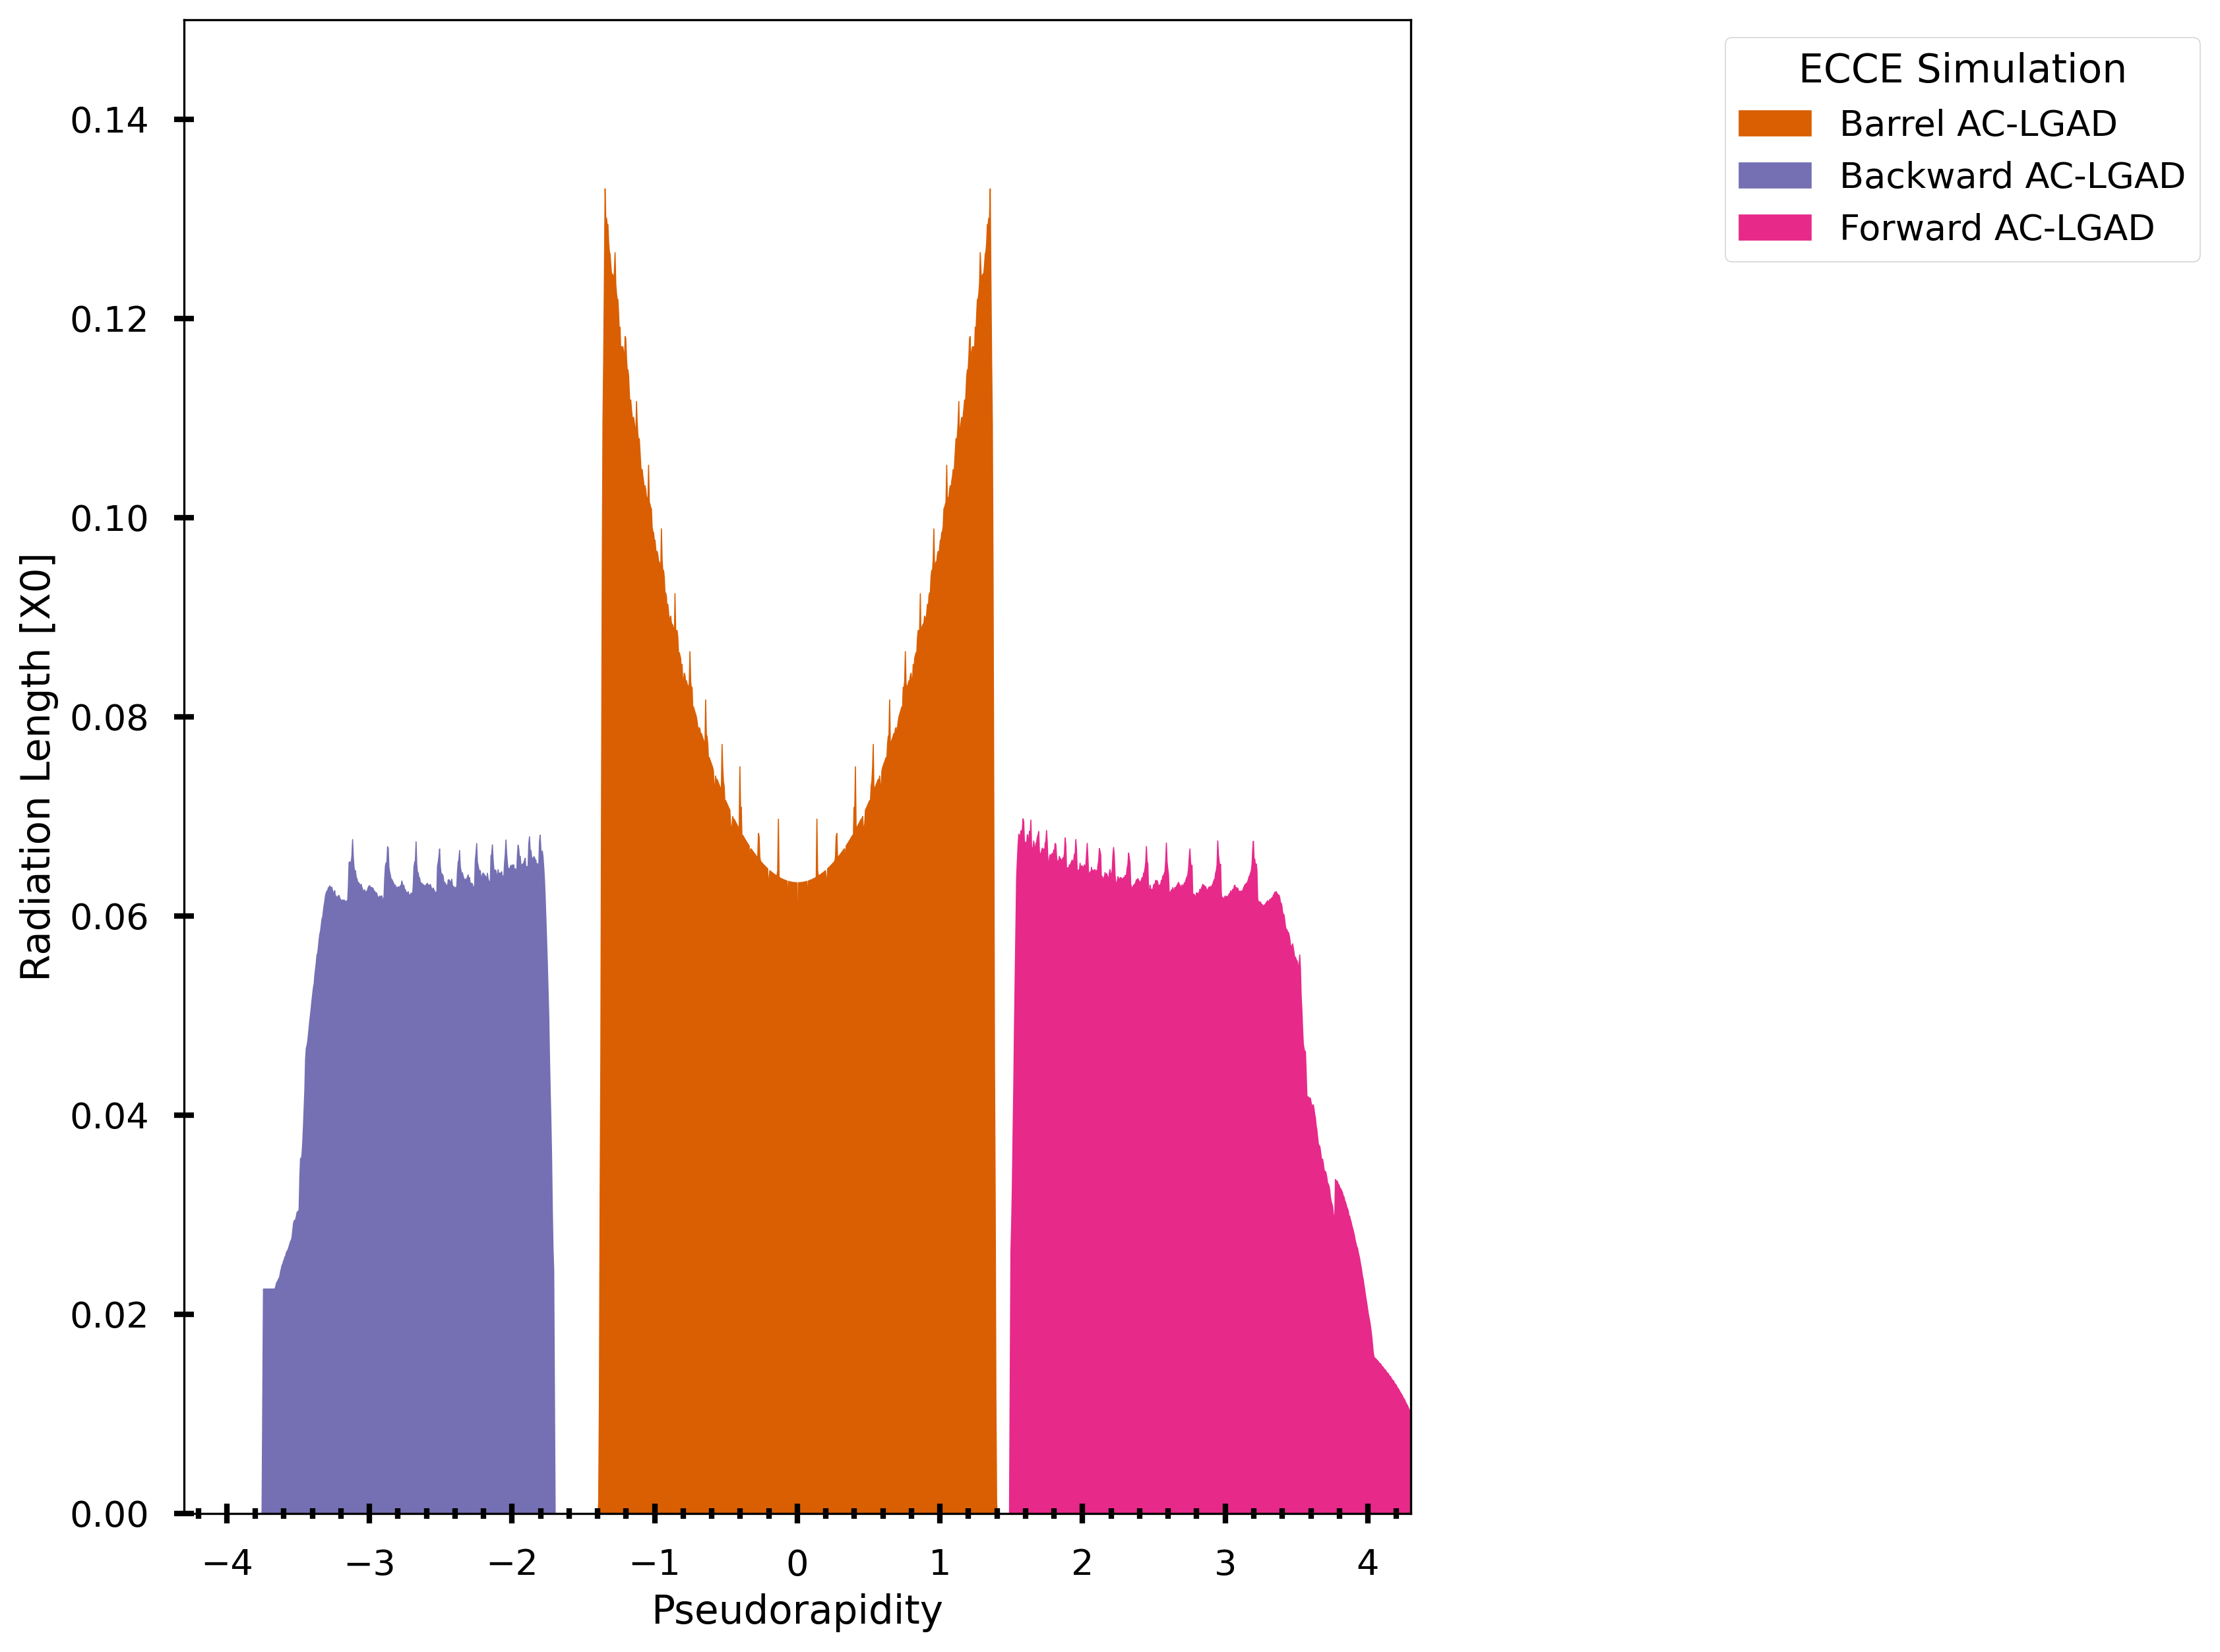

In [14]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10), dpi=300)

color_index = 1;

datasets_reverse = datasets.copy();
datasets_reverse.reverse();

for dataset in datasets_reverse:
    
    if "LGAD" not in dataset:
        continue;
    
    etas = df_x0['eta'].to_numpy()
    x0_avg= df_x0[dataset].to_numpy()
    
    ax.fill_between( etas, 0, x0_avg, label=dataset, color = colors[color_index])
   
    color_index = color_index +1
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([0, 0.15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = 'ECCE Simulation',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_LGAD.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_LGAD.png'), bbox_inches='tight')

## Si tracker alone

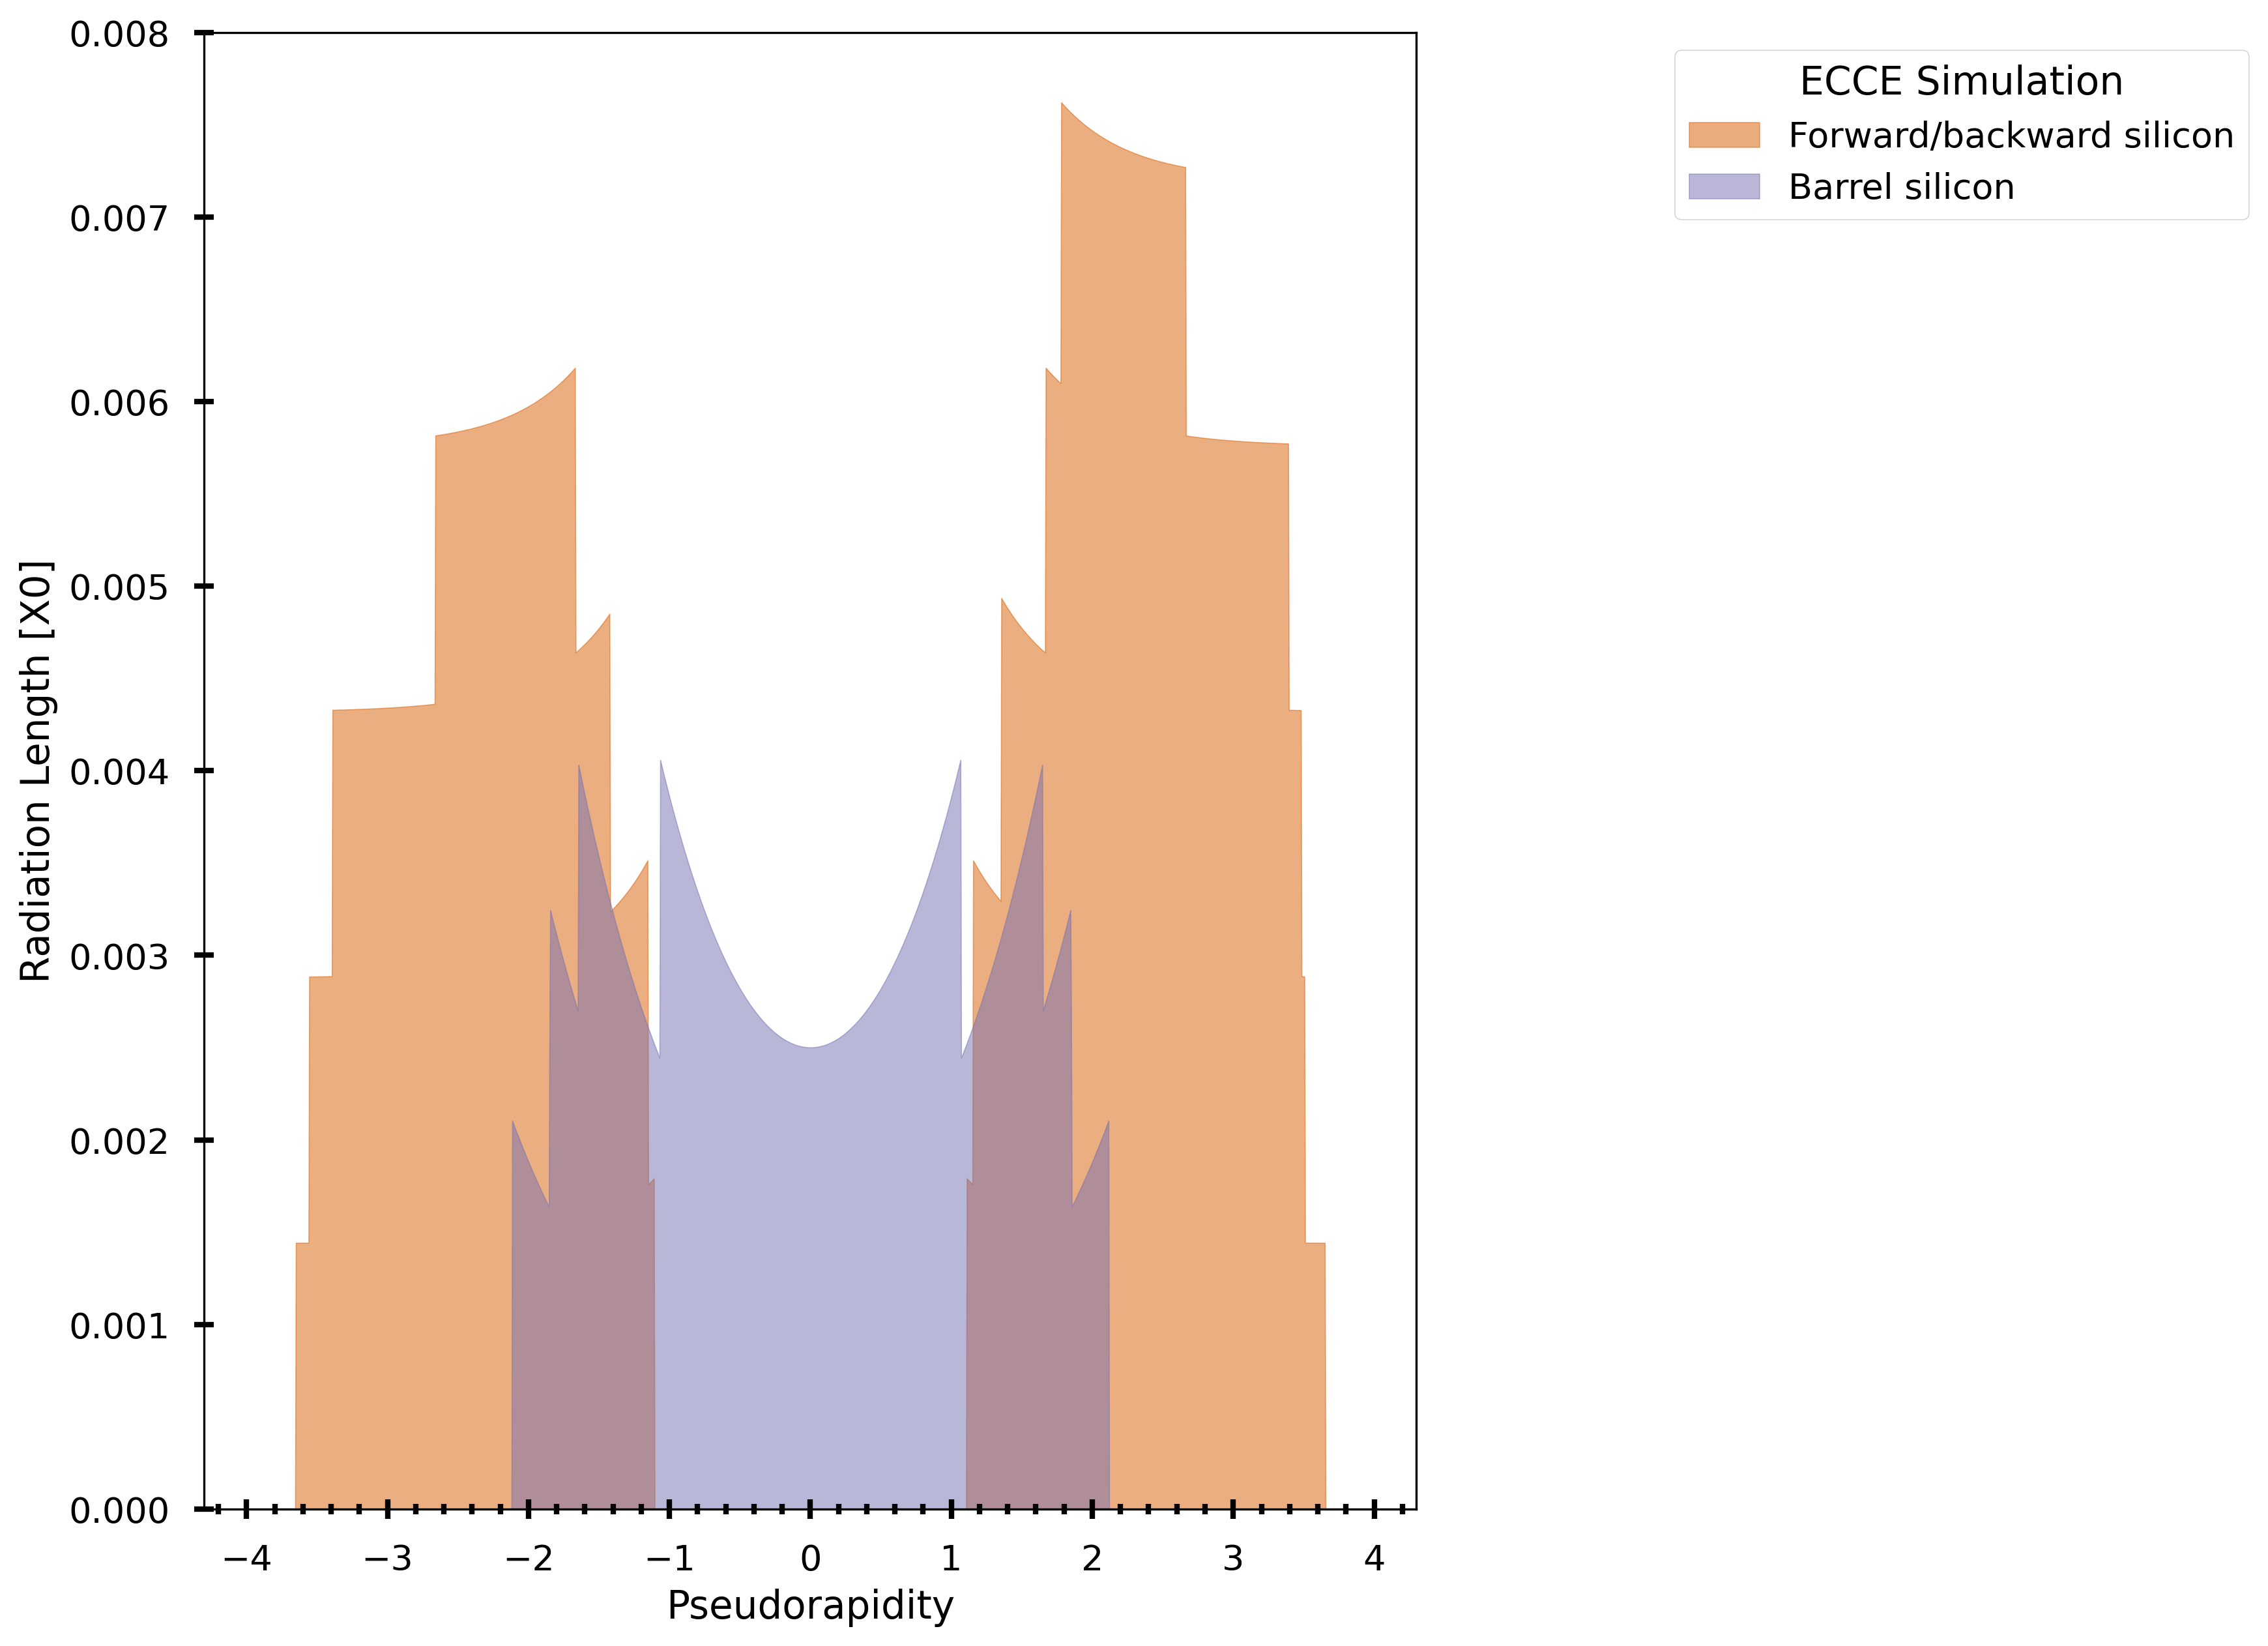

In [15]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10), dpi=300)

color_index = 1;

datasets_reverse = datasets.copy();
datasets_reverse.reverse();

for dataset in datasets_reverse:
    
    if "silicon" not in dataset:
        continue;
    
    etas = df_x0['eta'].to_numpy()
    x0_avg= df_x0[dataset].to_numpy()
    
    ax.fill_between( etas, 0, x0_avg, label=dataset, color = colors[color_index], alpha=0.5)
   
    color_index = color_index +1
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Pseudorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([0, 0.008]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = 'ECCE Simulation',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_silicon.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}x0_layer_Raditioan_Length_silicon.png'), bbox_inches='tight')